In [1]:
import pandas as pd
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("temperatures.csv") 

In [3]:
data.head(10)

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,TT_TU_MN009,2014,201501010000,3.4,7,6
1,TT_TU_MN009,2014,201501010100,3.1,7,6
2,TT_TU_MN009,2014,201501010200,2.6,7,1
3,TT_TU_MN009,2014,201501010300,2.8,7,1
4,TT_TU_MN009,2014,201501010400,2.5,7,1
5,TT_TU_MN009,2014,201501010500,2.0,7,1
6,TT_TU_MN009,2014,201501010600,1.9,7,1
7,TT_TU_MN009,2014,201501010700,1.4,7,1
8,TT_TU_MN009,2014,201501010800,1.5,7,1
9,TT_TU_MN009,2014,201501010900,2.3,7,1


**Convert time steps to 15 minutes intervel**

In [4]:
taskdata = data[['Zeitstempel', 'Wert']].copy()
taskdata['Date'] =  pd.to_datetime(taskdata['Zeitstempel'], format='%Y%m%d%H%M')
taskdata = taskdata[['Date', 'Wert']].copy()
taskdata['Date']= pd.to_datetime(taskdata['Date'])

In [5]:
taskdata.head()

,Date,Wert
0,2015-01-01 00:00:00,3.4
1,2015-01-01 01:00:00,3.1
2,2015-01-01 02:00:00,2.6
3,2015-01-01 03:00:00,2.8
4,2015-01-01 04:00:00,2.5


In [6]:
taskdata = taskdata.resample('15Min',on='Date').mean()

In [7]:
taskdata.head()

,Wert
Date,
2015-01-01 00:00:00,3.4
2015-01-01 00:15:00,NaN
2015-01-01 00:30:00,NaN
2015-01-01 00:45:00,NaN
2015-01-01 01:00:00,3.1


**Data Interpolution**

In [8]:
interpolate_data = taskdata.interpolate(method='spline', order=3).round(1)

In [9]:
interpolate_data.head()

,Wert
Date,
2015-01-01 00:00:00,3.4
2015-01-01 00:15:00,3.3
2015-01-01 00:30:00,3.2
2015-01-01 00:45:00,3.1
2015-01-01 01:00:00,3.1


**Hottest and Coldest day of the year**

In [10]:
interpolate_data['year'] = interpolate_data.index.year
df = interpolate_data.reset_index()
idx = interpolate_data.groupby(['year'])['Wert'].transform(max) == interpolate_data['Wert']
max_temp = interpolate_data[idx]
idx = interpolate_data.groupby(['year'])['Wert'].transform(min) == interpolate_data['Wert']
min_temp = interpolate_data[idx]


In [11]:
max_temp.to_csv('max_temp.csv')
max_temp

,Wert,year
Date,,
2015-07-04 14:00:00,36.0,2015
2016-08-28 14:00:00,34.0,2016
2017-06-22 11:00:00,31.9,2017
2018-08-07 14:30:00,36.1,2018
2018-08-07 14:45:00,36.1,2018
2018-08-07 15:15:00,36.1,2018
2018-08-07 15:30:00,36.1,2018
2019-07-25 13:45:00,37.5,2019
2020-02-16 19:00:00,17.7,2020


In [12]:
min_temp.to_csv('min_temp.csv')
min_temp

,Wert,year
Date,,
2015-02-07 02:15:00,-7.5,2015
2016-01-22 02:00:00,-12.0,2016
2017-01-06 05:00:00,-10.5,2017
2017-01-06 08:00:00,-10.5,2017
2018-03-02 06:00:00,-11.8,2018
2019-01-21 06:00:00,-9.0,2019
2020-01-01 08:00:00,-4.6,2020


**Hotest Day of the year with time of day on x axis**

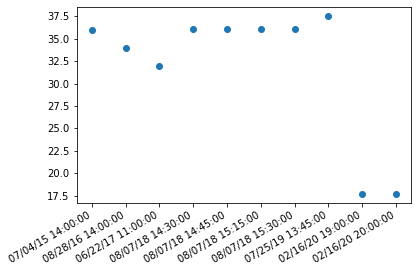

In [13]:
dates_n = max_temp.index.tolist()
val = []
for d in dates_n:
  dts = str(d.to_pydatetime())
  ds = datetime.strptime(dts, '%Y-%m-%d %H:%M:%S')
  ds = ds.strftime('%m/%d/%y %H:%M:%S')
  val.append(ds)
val
plt.plot_date(val, max_temp['Wert'], 'o')
plt.gcf().autofmt_xdate()

**Coldest Day of the year with time of day on x axis**

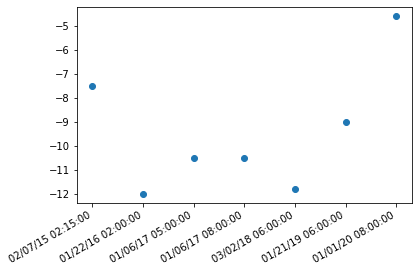

In [14]:
dates_n = min_temp.index.tolist()
val = []
for d in dates_n:
  dts = str(d.to_pydatetime())
  ds = datetime.strptime(dts, '%Y-%m-%d %H:%M:%S')
  ds = ds.strftime('%m/%d/%y %H:%M:%S')
  val.append(ds)
val
plt.plot_date(val, min_temp['Wert'], 'o')
plt.gcf().autofmt_xdate()

**One More Analysis** 

---


Here took the mean of weather data for every month in the particular year, and compare the mean weather of every month with another year. 

In [15]:
interpolate_data['month'] = interpolate_data.index.month
p_data = interpolate_data.resample('M').mean()
#p_data["Month_Year"] = p_data["month"].astype(str) + "-" + p_data["year"].astype(str)
p_data = p_data.reset_index()
p_data = p_data[["month", 'Wert']]

In [16]:
year_2015 = p_data.iloc[:12,:]
year_2016 = p_data.iloc[12:24,:]
year_2017 = p_data.iloc[24:36,:]
year_2018 = p_data.iloc[36:48,:]
year_2019 = p_data.iloc[48:60,:]

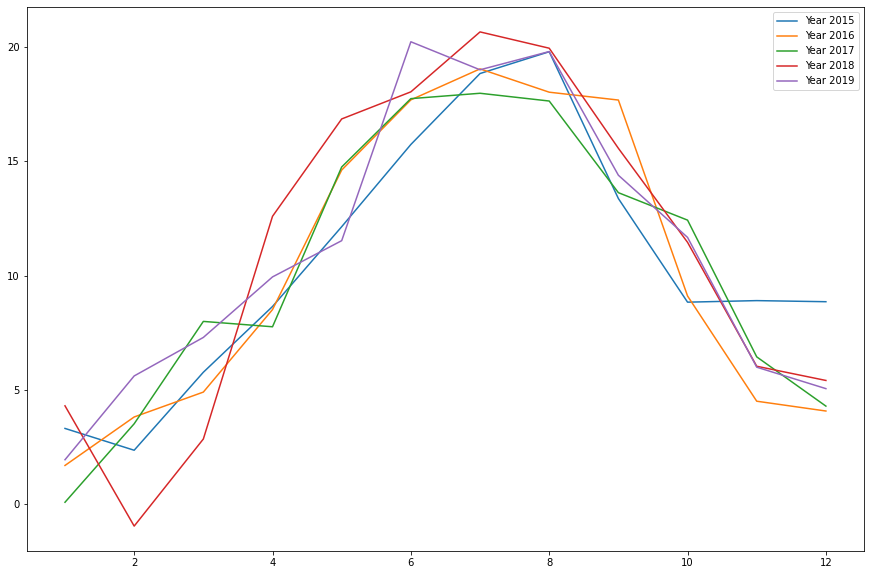

In [17]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(year_2015['month'],year_2015['Wert'], label="Year 2015")
plt.plot(year_2015['month'],year_2016['Wert'], label="Year 2016")
plt.plot(year_2015['month'],year_2017['Wert'], label="Year 2017")
plt.plot(year_2015['month'],year_2018['Wert'], label="Year 2018")
plt.plot(year_2015['month'],year_2019['Wert'], label="Year 2019")
plt.legend(loc="upper right")
plt.show()
